# Visualization

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_and_transform(file_name: str) -> tuple:
    # csvファイルを読み込んでdfに変換
    df =  pd.read_csv(file_name, header=None, names=['g', 'p', 'a', 'cooperator', 'punisher'])

    # p毎にdfを分割
    p_list = sorted(set(df.p))
    df_per_p = [df[df['p'] == _p] for _p in p_list]

    # x軸: a, y軸: g の表にピボット。cooperator (協力率) は平均する。
    df_per_p = [pd.pivot_table(data=_df, values='cooperator', columns='a', index='g', aggfunc=np.mean) for _df in df_per_p]
    df_per_p = [_df.sort_index(level=0, ascending=False, inplace=False) for _df in df_per_p]

    return df_per_p, p_list

def draw_heatmaps(df_list: list, p_list: list):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))

    for _i, _df in enumerate(df_list):
        axes[_i].set(title = 'p = {}'.format(p_list[_i]))
        sns.heatmap(_df, annot=True, fmt='.2f', cmap='Blues', vmin=0.0, vmax=1.0, cbar=(_i == 4), ax=axes[_i])

### パターン1

11/17受領のコードと同様のロジックで隣人リストを計算した場合、論文の結果を再現できる。

但し、0の隣人が {0, 0, 99, 1} になるロジックだが、それで正しいのか確認中。

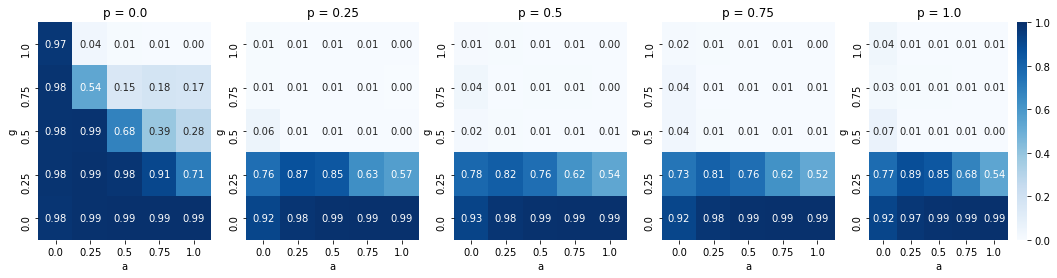

In [3]:
draw_heatmaps(*load_and_transform('out/py20211122_140622.csv'))

### パターン2

0の隣人は {98, 99, 1, 2} になるように隣人リストを計算した場合、論文の結果を再現できない。

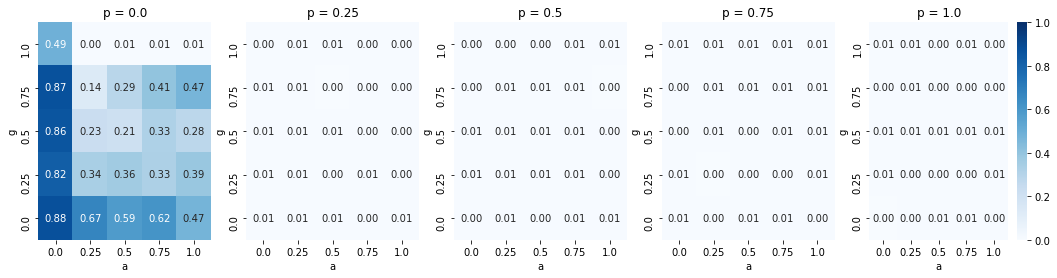

In [4]:
draw_heatmaps(*load_and_transform('out/py20211122_133700.csv'))